In [119]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

Nq = 20
Nc = 10
wq = 6.5 *2*pi
Ec = 0.2 *2*pi
pi = np.pi

In [120]:
b = destroy(Nq)
H = (wq+Ec)*b.dag()*b - Ec/12*(b.dag() + b)**4
EE4 = H.eigenstates()

In [121]:
print(EE4[0]/2/pi)
print("\n")
print(np.diff(EE4[0])/2/pi)
print("\n")
print(np.diff(np.diff(EE4[0])/2/pi))

[-5.18973836e-02  6.43436408e+00  1.26881656e+01  1.86796626e+01
  2.43657025e+01  2.96751639e+01  3.44627548e+01  3.84170756e+01
  4.13840215e+01  4.42318767e+01  4.79539468e+01  5.26365310e+01
  5.80184863e+01  6.41326682e+01  7.09460100e+01  7.86587379e+01
  8.72470615e+01  9.71872251e+01  1.08819082e+02  1.22780028e+02]


[ 6.48626146  6.25380154  5.99149693  5.68603995  5.30946144  4.78759089
  3.95432077  2.96694593  2.84785515  3.72207013  4.68258416  5.38195527
  6.11418194  6.81334176  7.71272791  8.58832365  9.94016357 11.63185658
 13.96094666]


[-0.23245992 -0.26230461 -0.30545698 -0.37657851 -0.52187056 -0.83327011
 -0.98737484 -0.11909079  0.87421499  0.96051403  0.69937111  0.73222666
  0.69915982  0.89938615  0.87559574  1.35183993  1.69169301  2.32909008]


In [122]:
b = destroy(Nq)
H = wq*b.dag()*b - Ec/2*b.dag()*b.dag()*b*b
EErwa = H.eigenstates()

In [123]:
print(EErwa[0]/2/pi)
print("\n")
print(np.diff(EErwa[0])/2/pi)
print("\n")
print(np.diff(np.diff(EErwa[0])/2/pi))

[ 0.   6.5 12.8 18.9 24.8 30.5 36.  41.3 46.4 51.3 56.  60.5 64.8 68.9
 72.8 76.5 80.  83.3 86.4 89.3]


[6.5 6.3 6.1 5.9 5.7 5.5 5.3 5.1 4.9 4.7 4.5 4.3 4.1 3.9 3.7 3.5 3.3 3.1
 2.9]


[-0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2
 -0.2 -0.2 -0.2 -0.2]


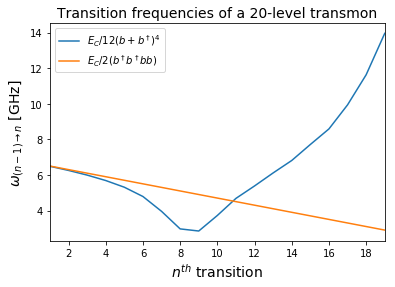

In [125]:
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)
plt.figure()
plt.plot(range(1,Nq), np.diff(EE4[0])/2/pi, label="$E_C/12(b + b^\\dagger)^4$")
plt.plot(range(1,Nq), np.diff(EErwa[0])/2/pi, label="$E_C/2(b^\\dagger b^\\dagger bb)$")
plt.xlim([1, 19])
plt.xlabel("$n^{{th}}$ transition")
plt.ylabel("$\\omega_{{(n-1)\\rightarrow n}}$ [GHz]")
plt.title("Transition frequencies of a {}-level transmon".format(Nq))
plt.legend()
plt.show()

In [126]:
b = tensor(destroy(Nq), qeye(Nc))
a = tensor(qeye(Nq), destroy(Nc))
g = 0*2*pi
nac = g/(4*Ec)*(100/2)**(-1/4)
n = -1j/2*(100/2)**(1/4) * (b-b.dag())
ng = nac*(a + a.dag())
phi = (100/2)**(-1/4)*(b + b.dag())
cosphi2 = -1/2*phi**2
cosphi4 = 1/24*phi**4
H = 4*Ec*(n - ng)**2 - 100*Ec*(cosphi2 + cosphi4)
EEcos = H.eigenstates()

In [127]:
print(EEcos[0][::Nc]/2/pi)
print("\n")
print(np.diff(EEcos[0][::Nc])/2/pi)
print("\n")
print(np.diff(np.diff(EEcos[0][::Nc])/2/pi))

[ 2.77613978  8.21621545 13.41549634 18.33252125 22.8956503  25.67187128
 27.1706723  29.64769683 32.87062047 33.80716986 40.00534664 40.19599125
 48.52893674 49.1365949  58.93293992 60.59952277 71.91472071 74.96962315
 87.46344827 93.91779585]


[ 5.44007567  5.19928089  4.91702491  4.56312905  2.77622098  1.49880102
  2.47702453  3.22292364  0.93654939  6.19817678  0.19064461  8.33294548
  0.60765817  9.79634502  1.66658284 11.31519794  3.05490244 12.49382512
  6.45434758]


[-0.24079478 -0.28225599 -0.35389585 -1.78690807 -1.27741996  0.97822352
  0.74589911 -2.28637425  5.26162738 -6.00753216  8.14230087 -7.72528732
  9.18868686 -8.12976218  9.6486151  -8.2602955   9.43892268 -6.03947754]


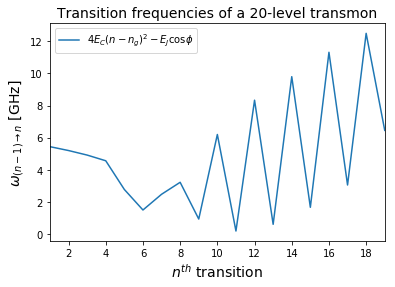

In [128]:
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)
plt.figure()
plt.plot(range(1,Nq), np.diff(EEcos[0][::Nc])/2/pi, label="$4E_C(n-n_g)^2-E_J\\cos \\phi$")
plt.xlim([1, 19])
plt.xlabel("$n^{{th}}$ transition")
plt.ylabel("$\\omega_{{(n-1)\\rightarrow n}}$ [GHz]")
plt.title("Transition frequencies of a {}-level transmon".format(Nq))
plt.legend()
plt.show()